<a href="https://colab.research.google.com/github/jojostx/eda-with-python/blob/main/employee_attrition_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, CategoricalNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
emp_data = pd.read_csv('/content/sample_data/HR-Employee-Attrition.csv')

In [3]:
emp_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,1.0,...,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
1,49,No,Travel_Frequently,279.0,Research & Development,8.0,1.0,Life Sciences,1.0,2.0,...,4.0,80.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0
2,37,Yes,Travel_Rarely,1373.0,Research & Development,2.0,2.0,Other,1.0,4.0,...,2.0,80.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0
3,33,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,1.0,5.0,...,3.0,80.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0
4,27,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,7.0,...,4.0,80.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0


In [4]:
emp_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
emp_data['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel', nan],
      dtype=object)

In [6]:
emp_data.size

51660

In [18]:
# check data type
emp_data.dtypes

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,float64
Department,object
DistanceFromHome,float64
Education,float64
EducationField,object
EmployeeNumber,float64
EnvironmentSatisfaction,float64


In [7]:
emp_data.isna().sum()

,0
Age,0
Attrition,0
BusinessTravel,6
DailyRate,6
Department,6
DistanceFromHome,6
Education,6
EducationField,6
EmployeeCount,6
EmployeeNumber,6


In [9]:
emp_data = emp_data.dropna()

In [10]:
emp_data.describe()

,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [16]:
# loop through the columns and check the unique values
def printUnique(df):
  for col in df.columns:
    if df[col].dtype == 'object' or len(df[col].unique()) < 2:
      print(f"Unique values in column '{col}':")
      print(df[col].unique())
      print()

printUnique(emp_data)

Unique values in column 'Attrition':
['Yes' 'No']

Unique values in column 'BusinessTravel':
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Unique values in column 'Department':
['Sales' 'Research & Development' 'Human Resources']

Unique values in column 'EducationField':
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Unique values in column 'Gender':
['Female' 'Male']

Unique values in column 'JobRole':
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

Unique values in column 'MaritalStatus':
['Single' 'Married' 'Divorced']

Unique values in column 'OverTime':
['Yes' 'No']



In [13]:
# drop categorical columns with only one level
emp_data = emp_data.drop(['Over18', 'StandardHours', 'EmployeeCount'], axis=1)

In [14]:
# convert Age column values to int
emp_data['Age'] = emp_data['Age'].astype(int)

In [17]:
# check categorical levels again
printUnique(emp_data)

Unique values in column 'Attrition':
['Yes' 'No']

Unique values in column 'BusinessTravel':
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Unique values in column 'Department':
['Sales' 'Research & Development' 'Human Resources']

Unique values in column 'EducationField':
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Unique values in column 'Gender':
['Female' 'Male']

Unique values in column 'JobRole':
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

Unique values in column 'MaritalStatus':
['Single' 'Married' 'Divorced']

Unique values in column 'OverTime':
['Yes' 'No']



In [ ]:
# dynamically collect categorical columns
cat_cols = [col for col in emp_data.columns if emp_data[col].dtype == 'object' and col != 'Attrition']


In [19]:
# check columns
emp_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [20]:
# drop Gender, EmployeeNumber
emp_data = emp_data.drop(['Gender', 'EmployeeNumber'], axis=1)

In [21]:
# check columns
emp_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [29]:
# drop columns that are correlated/dependent
emp_data = emp_data.drop(['DailyRate', 'MonthlyRate'], axis=1)

In [30]:
# check columns
emp_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [33]:
# check correlation matrix
emp_data_cp = emp_data.copy()

# get target column
target = "Attrition"

# get numerical columns
num_cols = emp_data_cp.select_dtypes(include=["int64", "float64"]).columns.tolist()
num_cols = [c for c in num_cols if c != target]

emp_data_num = emp_data_cp[num_cols]

# get correlation matrix
corr_matrix = emp_data_num.corr().round(2)

# print correlation matrix
print(corr_matrix)

                           Age  DistanceFromHome  Education  \
Age                       1.00             -0.00       0.21   
DistanceFromHome         -0.00              1.00       0.02   
Education                 0.21              0.02       1.00   
EnvironmentSatisfaction   0.01             -0.02      -0.03   
HourlyRate                0.02              0.03       0.02   
JobInvolvement            0.03              0.01       0.04   
JobLevel                  0.51              0.01       0.10   
JobSatisfaction          -0.00             -0.00      -0.01   
MonthlyIncome             0.50             -0.02       0.09   
NumCompaniesWorked        0.30             -0.03       0.13   
PercentSalaryHike         0.00              0.04      -0.01   
PerformanceRating         0.00              0.03      -0.02   
RelationshipSatisfaction  0.05              0.01      -0.01   
StockOptionLevel          0.04              0.04       0.02   
TotalWorkingYears         0.68              0.00       

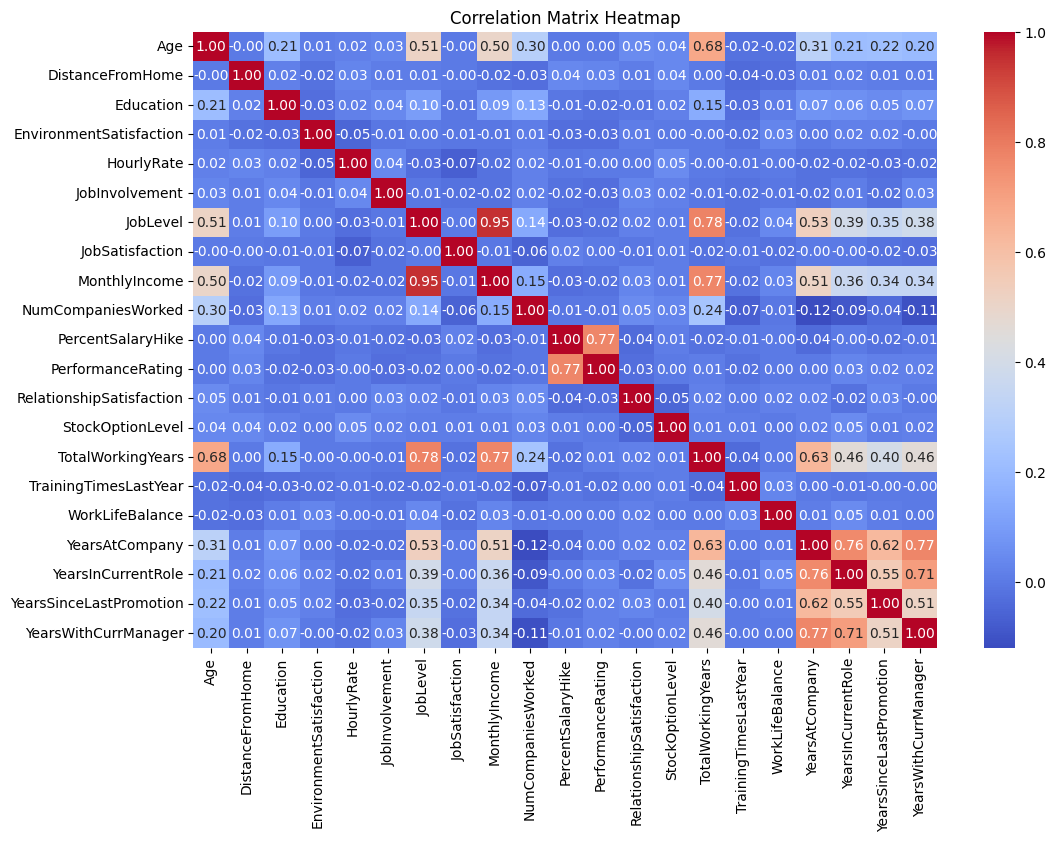

In [37]:
plt.figure(figsize=(12, 8)) # Adjust figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [39]:
priority = [
    "Age",
    "TotalWorkingYears",
    "YearsAtCompany",
    "MonthlyIncome",
    "DistanceFromHome",
    target
]

corr = emp_data_cp.select_dtypes(include=["int64", "float64"]).corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

to_drop = set()

for col in upper.columns:
    high_corr = upper[col][upper[col] > 0.7].index
    for row in high_corr:
        drop = col if col not in priority else row
        to_drop.add(drop)

emp_data_reduced = emp_data_cp.drop(columns=to_drop)


In [40]:
emp_data_reduced.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsSinceLastPromotion'],
      dtype='object')

In [52]:
len(emp_data_reduced.columns)

23

In [42]:
# drop duplicate rows
emp_data_reduced = emp_data_reduced.drop_duplicates()

In [ ]:
priority = [
    "Age",
    "TotalWorkingYears",
    "YearsAtCompany",
    "MonthlyIncome",
    "DistanceFromHome",
    target
]

corr = emp_data_cp.select_dtypes(include=["int64", "float64"]).corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

to_drop = set()

for col in upper.columns:
    high_corr = upper[col][upper[col] > 0.7].index
    for row in high_corr:
        drop = col if col not in priority else row
        to_drop.add(drop)

emp_data_reduced = emp_data_cp.drop(columns=to_drop)


In [53]:
# check data type
emp_data_reduced.dtypes

,0
Age,int64
Attrition,object
BusinessTravel,object
Department,object
DistanceFromHome,float64
Education,float64
EducationField,object
EnvironmentSatisfaction,float64
HourlyRate,float64
JobInvolvement,float64


In [55]:
outlier_threshold = 3
outliers_data = {}

# Select numeric columns (excluding Attrition)
num_cols = emp_data_reduced.select_dtypes(include=np.number).columns.tolist()
if 'Attrition' in num_cols:
    num_cols.remove('Attrition')

for col in num_cols:
    # Fill NaN with mean
    col_data = emp_data_reduced[col].fillna(emp_data_reduced[col].mean())

    # Skip columns with zero variance
    if col_data.std() == 0:
        continue

    # Calculate z-scores
    z_scores = np.abs(zscore(col_data, nan_policy='omit'))

    # Get outlier mask
    outlier_mask = z_scores > outlier_threshold

    # Store outlier values and their indices
    if outlier_mask.sum() > 0:
        outliers_data[col] = {
            'values': emp_data_reduced.loc[outlier_mask, col].values,
            'indices': emp_data_reduced[outlier_mask].index.tolist(),
            'count': outlier_mask.sum()
        }

# Display results
print("Outliers by Column (|z| > 3):\n")
for col, data in outliers_data.items():
    print(f"\n{col}: {data['count']} outliers")
    print(f"  Values: {data['values']}")
    print(f"  Row indices: {data['indices']}")

# Alternative: Create a DataFrame with all outliers
outlier_records = []

for col in num_cols:
    col_data = emp_data_reduced[col].fillna(emp_data_reduced[col].mean())

    if col_data.std() == 0:
        continue

    z_scores = np.abs(zscore(col_data, nan_policy='omit'))
    outlier_mask = z_scores > outlier_threshold

    if outlier_mask.sum() > 0:
        for idx in emp_data_reduced[outlier_mask].index:
            outlier_records.append({
                'column': col,
                'row_index': idx,
                'value': emp_data_reduced.loc[idx, col],
                'z_score': z_scores[emp_data_reduced.index.get_loc(idx)]
            })

# Create DataFrame of all outliers
outliers_df = pd.DataFrame(outlier_records)
print("\n\nAll Outliers DataFrame:")
print(outliers_df)

# Group by column to see summary
print("\n\nOutliers Summary by Column:")
print(outliers_df.groupby('column').agg({
    'value': ['count', 'min', 'max', 'mean'],
    'z_score': ['min', 'max', 'mean']
}))

Outliers by Column (|z| > 3):


TotalWorkingYears: 16 outliers
  Values: [37. 38. 40. 36. 37. 36. 37. 40. 35. 36. 36. 35. 36. 36. 37. 35.]
  Row indices: [85, 98, 126, 187, 270, 401, 445, 595, 624, 894, 956, 1043, 1116, 1184, 1301, 1401]

YearsAtCompany: 25 outliers
  Values: [27. 37. 40. 33. 33. 36. 29. 27. 31. 32. 34. 26. 31. 31. 26. 32. 26. 33.
 29. 33. 32. 33. 36. 26. 30.]
  Row indices: [62, 98, 126, 190, 237, 270, 411, 425, 473, 477, 561, 592, 595, 653, 677, 749, 861, 914, 918, 962, 1086, 1111, 1116, 1135, 1138]

YearsSinceLastPromotion: 42 outliers
  Values: [15. 13. 12. 12. 15. 15. 15. 12. 15. 13. 12. 15. 13. 12. 14. 13. 14. 15.
 15. 13. 13. 15. 13. 15. 14. 15. 15. 15. 12. 14. 13. 13. 12. 14. 14. 14.
 12. 13. 14. 14. 12. 12.]
  Row indices: [45, 62, 64, 110, 123, 126, 178, 218, 237, 326, 386, 425, 427, 535, 584, 595, 653, 701, 752, 799, 838, 861, 875, 914, 922, 926, 937, 976, 1008, 1078, 1086, 1093, 1138, 1156, 1221, 1223, 1242, 1295, 1301, 1303, 1331, 1414]


All Outliers Data

### from the print and summary of the outliers, only age columns have outliers in them and the outliers all are valid data, so we will keep them and proceed with modeling

In [ ]:
# start constructing logistic regression models, naive bayes models
# and decision trees models, I'll also like to analyze the metrics
# accuracy score, recall score, precision score and other relevant
# scores. I'll also want to compare the different types of NBs
# classifiers

In [62]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score # Ensure this is imported for roc_auc_score
from sklearn.preprocessing import KBinsDiscretizer # Import KBinsDiscretizer

# Target variable
target_col = 'Attrition'
y = emp_data[target_col]
X = emp_data.drop(columns=[target_col])

# ===============================
# 3️⃣ Identify categorical and numeric features
# ===============================
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Categorical columns: {categorical_cols}")
print(f"Numeric columns: {numeric_cols}\n")

# ===============================
# 4️⃣ Split data
# ===============================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ===============================
# 5️⃣ Preprocessing Pipelines
# ===============================

# Numeric preprocessing: Impute missing values with mean and scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Numeric preprocessing for CategoricalNB: Impute, then discretize
numeric_transformer_cnb = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('discretizer', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')) # Discretize numerical features into bins
])

# Categorical preprocessing: One-hot encode for most models
categorical_transformer_ohe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Categorical preprocessing: Ordinal encode for Categorical Naive Bayes
categorical_transformer_ordinal = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=9)) # Changed unknown_value to a non-conflicting, non-negative integer
])

# ===============================
# 6️⃣ Column Transformers
# ===============================

# Preprocessor for models expecting One-Hot Encoded categorical features
preprocessor_ohe = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer_ohe, categorical_cols)
    ])

# Preprocessor for models expecting Ordinal Encoded categorical features (e.g., CategoricalNB)
# Numeric columns for CategoricalNB should be discretized and categorical columns ordinal encoded
preprocessor_ordinal = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_cnb, numeric_cols), # Use numeric_transformer_cnb here
        ('cat', categorical_transformer_ordinal, categorical_cols)
    ])

# ===============================
# 7️⃣ Encode target variable
# ===============================
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# ===============================
# 8️⃣ Model Training and Evaluation
# ===============================

results = []

# Helper function to evaluate and store results
def evaluate_model(model_name, y_true, y_pred, y_proba):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_true, y_proba)
    return {'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1, 'ROC-AUC': roc_auc}

# --- Logistic Regression ---
log_reg_model = Pipeline(steps=[('preprocessor', preprocessor_ohe),
                                ('classifier', LogisticRegression(random_state=42, solver='liblinear'))])
log_reg_model.fit(X_train, y_train_encoded)
y_pred_lr = log_reg_model.predict(X_test)
y_proba_lr = log_reg_model.predict_proba(X_test)[:, 1]
results.append(evaluate_model('Logistic Regression', y_test_encoded, y_pred_lr, y_proba_lr))

# --- Decision Tree ---
dt_model = Pipeline(steps=[('preprocessor', preprocessor_ohe),
                           ('classifier', DecisionTreeClassifier(random_state=42))])
dt_model.fit(X_train, y_train_encoded)
y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]
results.append(evaluate_model('Decision Tree', y_test_encoded, y_pred_dt, y_proba_dt))

# --- Gaussian Naive Bayes ---
gnb_pipeline = Pipeline(steps=[('preprocessor', preprocessor_ohe),
                               ('classifier', GaussianNB())])
gnb_pipeline.fit(X_train, y_train_encoded)
y_pred_gnb = gnb_pipeline.predict(X_test)
y_proba_gnb = gnb_pipeline.predict_proba(X_test)[:, 1]
results.append(evaluate_model('GaussianNB', y_test_encoded, y_pred_gnb, y_proba_gnb))

# --- Categorical Naive Bayes ---
cnb_pipeline = Pipeline(steps=[('preprocessor', preprocessor_ordinal),
                               ('classifier', CategoricalNB())])
cnb_pipeline.fit(X_train, y_train_encoded)
y_pred_cnb = cnb_pipeline.predict(X_test)
y_proba_cnb = cnb_pipeline.predict_proba(X_test)[:, 1]
results.append(evaluate_model('CategoricalNB', y_test_encoded, y_pred_cnb, y_proba_cnb))

# --- Bernoulli Naive Bayes ---
bnb_pipeline = Pipeline(steps=[('preprocessor', preprocessor_ohe),
                               ('classifier', BernoulliNB())])
bnb_pipeline.fit(X_train, y_train_encoded)
y_pred_bnb = bnb_pipeline.predict(X_test)
y_proba_bnb = bnb_pipeline.predict_proba(X_test)[:, 1]
results.append(evaluate_model('BernoulliNB', y_test_encoded, y_pred_bnb, y_proba_bnb))

# Display results
results_df = pd.DataFrame(results)
print("\n=== Model Comparison ===")
print(results_df.round(4).to_string(index=False))

# Optional: Print confusion matrices for more detail
print("\n=== Confusion Matrices ===")
print("Logistic Regression:\n", confusion_matrix(y_test_encoded, y_pred_lr))
print("Decision Tree:\n", confusion_matrix(y_test_encoded, y_pred_dt))
print("GaussianNB:\n", confusion_matrix(y_test_encoded, y_pred_gnb))
print("CategoricalNB:\n", confusion_matrix(y_test_encoded, y_pred_cnb))
print("BernoulliNB:\n", confusion_matrix(y_test_encoded, y_pred_bnb))

Categorical columns: ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']
Numeric columns: ['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


=== Model Comparison ===
              Model  Accuracy  Precision  Recall     F1  ROC-AUC
Logistic Regression    0.8673     0.6538  0.3617 0.4658   0.8099
      Decision Tree    0.8163     0.4255  0.4255 0.4255   0.6581
         GaussianNB    0.6429     0.2583  0.6596 0.3713   0.7030
      CategoricalNB    0.7959     0.4000  0.5532 0.4643   0.7753
        BernoulliNB    0.8231     0.4576  0.5745 0.5094   0.7720

=== Confusion Matrices ===
Logistic R